# Complex networks with NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.org/documentation/stable/index.html</a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx
import scipy
import collections

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Step 1: adding nodes

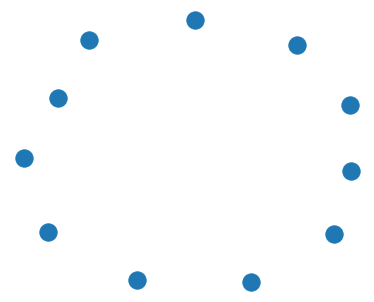

In [ ]:

# Initialize a graph object
G1 = nx.Graph()

#Adding a first node
G1.add_node(1)

#Adding more nodes
G1.add_nodes_from([2,3,4,5,6,8,9,12,15,16])

#Drawing the graph
nx.draw(G1)

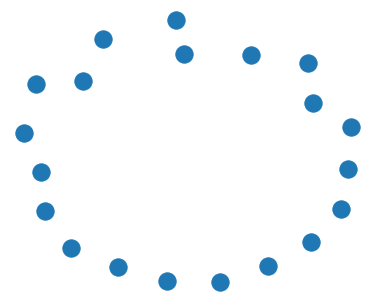

In [ ]:
# add a group of nodes at once
G2=nx.Graph()
H = nx.path_graph(20)
G2.add_nodes_from(H)
nx.draw(G2)

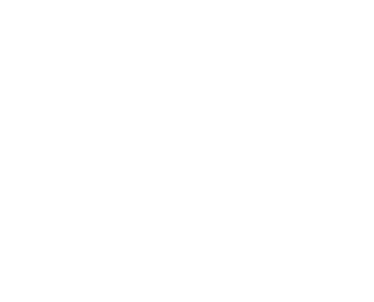

In [ ]:
# remove or clear
G2.clear()
nx.draw(G2)

## Step 2: adding links (or edges)

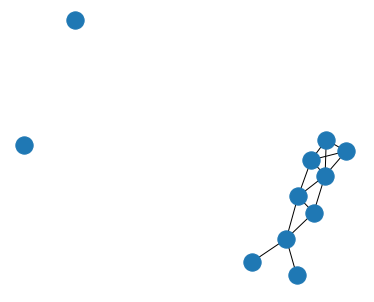

In [ ]:
#Adding edges
G1.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9), (3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])

#Drawing the graph
nx.draw(G1)

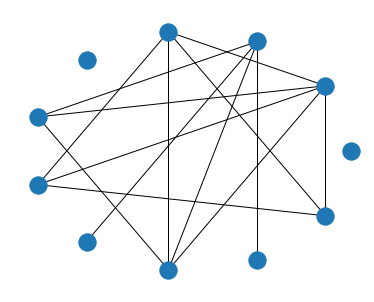

In [ ]:
#Drawing the graph in circular mode
nx.draw_circular(G1)

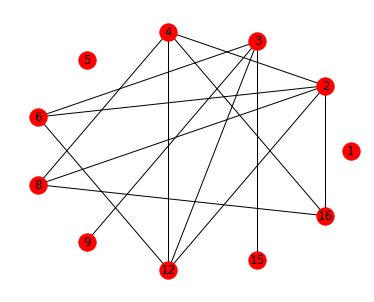

In [ ]:
#Labeling and coloring graph nodes
nx.draw_circular(G1, node_color='red', with_labels=True)

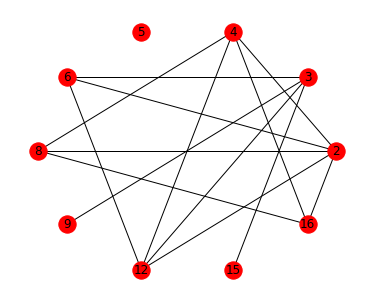

In [ ]:
#Removing a node
G1.remove_node(1)
nx.draw_circular(G1, node_color='red', with_labels=True)

In [ ]:
#Identifying graph properties
summmary_info= nx.info(G1)
print(summmary_info)

Graph with 10 nodes and 14 edges


<ipython-input-36-1839456be87b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  summmary_info= nx.info(G1)


In [ ]:
#Viewing degree of each node 
print(nx.degree(G1))

[(2, 5), (3, 4), (4, 4), (5, 0), (6, 3), (8, 3), (9, 1), (12, 4), (15, 1), (16, 3)]


## Step 3: using graph generators

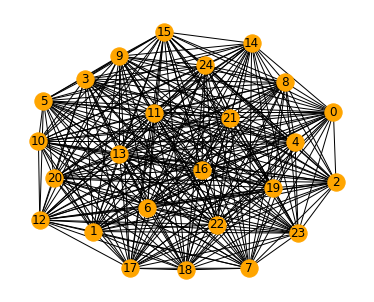

In [ ]:
#Creating a complete graph
G = nx.complete_graph(25)
nx.draw(G, node_color='orange', with_labels=True)

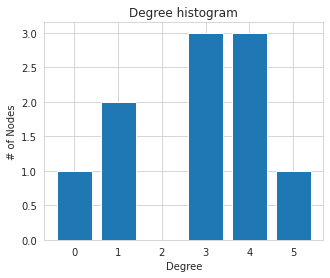

In [ ]:
degree_sequence = sorted((d for n, d in G1.degree()), reverse=True)
dmax = max(degree_sequence)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

plt.show()

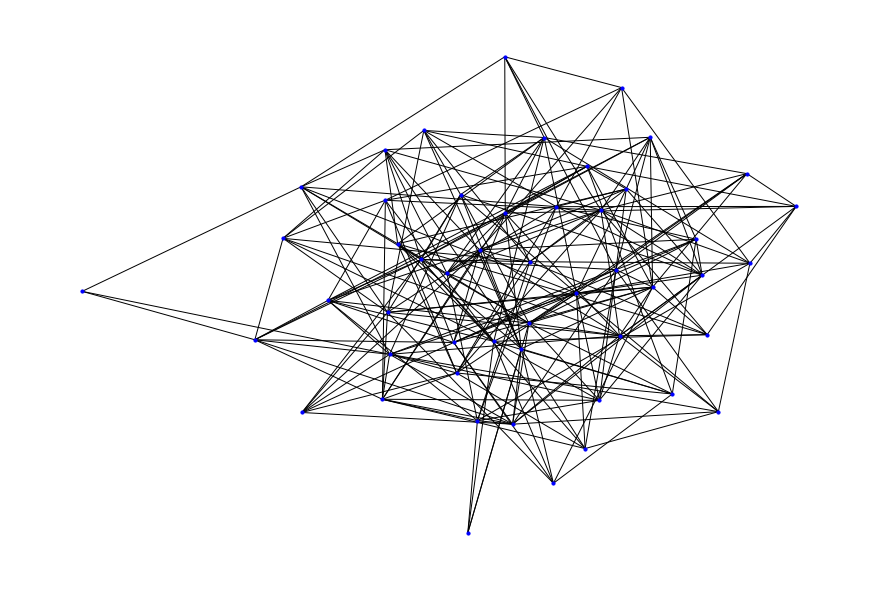

In [ ]:
# Generate Erdos-Renyi Graph
n = 50
p = 0.2
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)
# Plot the graph
plt.figure(figsize=(12,8))
nx.draw(G_erdos, node_color='blue', node_size=10)

Text(0.5, 0, 'Degree')

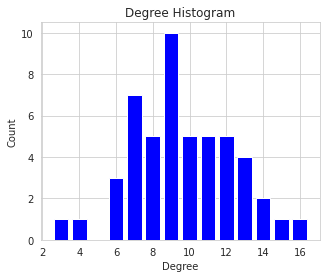

In [ ]:
degree_sequence = sorted([d for n, d in G_erdos.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

In [ ]:
# Descriptive Statistics
'''
The average degree is given by n×p. 
With p=0.2 and n=50, we are centered around 10.
The degree expectation is given by (n−1)×p
'''

# Get the list of the degrees
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Expected degree : " + str(esp_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 50
Number of edges : 240
Maximum degree : 16
Minimum degree : 3
Average degree : 9.6
Expected degree : 9.8
Median degree : 9.0


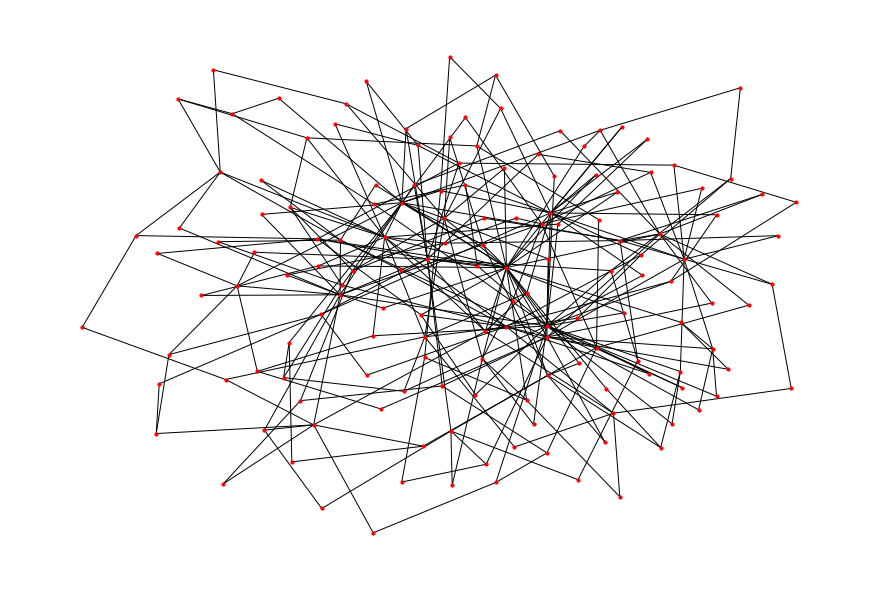

In [ ]:
# Generate Barabasi-Albert Graph
'''
The aim of such graph is to model preferential attachment, which is often observed in real networks.
'''
n = 150
m = 2
G_barabasi = nx.barabasi_albert_graph(n,m)

plt.figure(figsize=(12,8))
nx.draw(G_barabasi, node_color='red', node_size=10)

Text(0.5, 0, 'Degree')

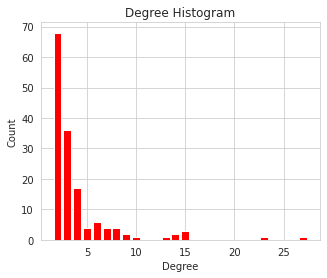

In [ ]:
degree_sequence = sorted([d for n, d in G_barabasi.degree()], reverse=True)  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="red")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

## Step 5: explore distances

In [ ]:
# Load the graph
G_karate = nx.karate_club_graph()
#nx.shortest_path(G_karate)
list(nx.all_pairs_shortest_path_length(G_karate))

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   31: 1,
   9: 2,
   16: 2,
   24: 2,
   25: 2,
   27: 2,
   28: 2,
   30: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   26: 3,
   29: 3}),
 (1,
  {1: 0,
   0: 1,
   2: 1,
   3: 1,
   7: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   30: 1,
   4: 2,
   5: 2,
   6: 2,
   8: 2,
   9: 2,
   10: 2,
   11: 2,
   12: 2,
   27: 2,
   28: 2,
   31: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   16: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   24: 3,
   25: 3,
   26: 3,
   29: 3}),
 (2,
  {2: 0,
   0: 1,
   1: 1,
   32: 1,
   3: 1,
   7: 1,
   8: 1,
   9: 1,
   13: 1,
   27: 1,
   28: 1,
   4: 2,
   5: 2,
   6: 2,
   10: 2,
   11: 2,
   12: 2,
   14: 2,
   15: 2,
   17: 2,
   18: 2,
   19: 2,
   20: 2,
   21: 2,
   22: 2,
   23: 2,
   24: 2,
   29: 2,
   30: 2,
   31: 2,
   33: 2,
   16: 3,
   25: 3,
 

In [ ]:
# Community detection via Girvan-Newman
import itertools  
from networkx.algorithms import community
comp = community.girvan_newman(G_karate)


[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


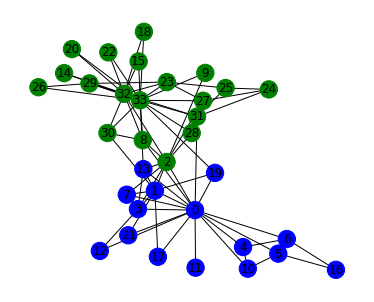

In [ ]:
node_groups = []
for com in next(comp):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G_karate:
  if node in node_groups[0]:
    color_map.append('blue')
  else:
    color_map.append('green')
nx.draw(G_karate, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
print(community.modularity(G_karate, node_groups))

partition = community.louvain_communities(G_karate)
print(partition)
print(community.modularity(G_karate, partition))


0.3476602762317048
[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}, {24, 25, 28, 31}]
0.4438541256723075


## Step 6: build and analyze your network

In [ ]:
SW=nx.Graph()
SW.add_node(0,  name= "C-3PO",  value=42, colour="#FFD700")
SW.add_node(1,name= "LUKE", value= 88, colour="#3881e5")
SW.add_node(2, name="DARTH VADER",value= 25, colour= "#000000")
SW.add_node(3,  name= "CAMIE", value= 3, colour= "#808080")
SW.add_node(4,  name= "BIGGS", value= 18, colour= "#808080")
SW.add_node(5,  name="LEIA", value= 25, colour= "#DCDCDC")
SW.add_node(6,  name= "BERU", value=5, colour="#808080")
SW.add_node(7,  name= "OWEN", value= 6, colour= "#808080")
SW.add_node(8, name="OBI-WAN", value= 22, colour= "#48D1CC")
SW.add_node(9, name= "MOTTI", value = 3, colour= "#808080")
SW.add_node(10, name="TARKIN", value=12, colour= "#808080")
SW.add_node(11, name= "HAN", value= 44, colour= "#ff9400")
SW.add_node(12, name= "GREEDO", value= 2, colour= "#808080")
SW.add_node(13, name= "JABBA", value= 2, colour= "#808080")
SW.add_node(14, name= "DODONNA", value= 3, colour= "#808080")
SW.add_node(15, name= "GOLD LEADER", value= 14, colour= "#808080")
SW.add_node(16, name= "WEDGE", value= 15, colour= "#808080")
SW.add_node(17, name= "RED LEADER", value= 33, colour= "#808080")
SW.add_node(18, name= "RED TEN", value= 8, colour= "#808080")
SW.add_node(19, name= "GOLD FIVE", value= 8, colour= "#808080")

SW.nodes(data=True)

NodeDataView({0: {'name': 'C-3PO', 'value': 42, 'colour': '#FFD700'}, 1: {'name': 'LUKE', 'value': 88, 'colour': '#3881e5'}, 2: {'name': 'DARTH VADER', 'value': 25, 'colour': '#000000'}, 3: {'name': 'CAMIE', 'value': 3, 'colour': '#808080'}, 4: {'name': 'BIGGS', 'value': 18, 'colour': '#808080'}, 5: {'name': 'LEIA', 'value': 25, 'colour': '#DCDCDC'}, 6: {'name': 'BERU', 'value': 5, 'colour': '#808080'}, 7: {'name': 'OWEN', 'value': 6, 'colour': '#808080'}, 8: {'name': 'OBI-WAN', 'value': 22, 'colour': '#48D1CC'}, 9: {'name': 'MOTTI', 'value': 3, 'colour': '#808080'}, 10: {'name': 'TARKIN', 'value': 12, 'colour': '#808080'}, 11: {'name': 'HAN', 'value': 44, 'colour': '#ff9400'}, 12: {'name': 'GREEDO', 'value': 2, 'colour': '#808080'}, 13: {'name': 'JABBA', 'value': 2, 'colour': '#808080'}, 14: {'name': 'DODONNA', 'value': 3, 'colour': '#808080'}, 15: {'name': 'GOLD LEADER', 'value': 14, 'colour': '#808080'}, 16: {'name': 'WEDGE', 'value': 15, 'colour': '#808080'}, 17: {'name': 'RED LEAD

In [ ]:
SW.add_edge(3, 1, weight=2)
SW.add_edge(4, 3, weight=2)
SW.add_edge(4, 1, weight=4)
SW.add_edge(2, 5, weight=1)
SW.add_edge(6, 1, weight=3)
SW.add_edge(6, 7, weight=3)
SW.add_edge(6, 7, weight=3)
SW.add_edge(6, 0, weight=2)
SW.add_edge(1, 7, weight=3)
SW.add_edge(0, 1, weight=18)
SW.add_edge(0, 7, weight=2)
SW.add_edge(0, 5, weight=6)
SW.add_edge(5, 1, weight=17)
SW.add_edge(6, 5, weight=1)
SW.add_edge(1, 8, weight=19)
SW.add_edge(0, 7, weight=6)
SW.add_edge(5, 8, weight=1)
SW.add_edge(9, 10, weight=2)
SW.add_edge(2, 9, weight=1)
SW.add_edge(2, 10, weight=7)
SW.add_edge(11, 8, weight=9)
SW.add_edge(11, 1, weight=26)
SW.add_edge(12, 11, weight=1)
SW.add_edge(11, 13, weight=1)
SW.add_edge(0, 11, weight=6)
SW.add_edge(5, 9, weight=1)
SW.add_edge(5, 10, weight=1)
SW.add_edge(11, 5, weight=13)
SW.add_edge(2, 8, weight=1)
SW.add_edge(14, 15, weight=1)
SW.add_edge(14, 15, weight=1)
SW.add_edge(14, 1, weight=1)
SW.add_edge(15, 16, weight=1)
SW.add_edge(15, 1, weight=1)
SW.add_edge(1, 16, weight=2)
SW.add_edge(4, 5, weight=1)
SW.add_edge(5, 17, weight=1)
SW.add_edge(1, 17, weight=3)
SW.add_edge(4, 17, weight=3)
SW.add_edge(4, 0, weight=1)
SW.add_edge(0, 17, weight=1)
SW.add_edge(17, 16, weight=3)
SW.add_edge(15, 17, weight=1)
SW.add_edge(4, 16, weight=2)
SW.add_edge(17, 18, weight=1)
SW.add_edge(4, 15, weight=1)
SW.add_edge(1, 18, weight=1)


SW.edges(data=True)


EdgeDataView([(0, 6, {'weight': 2}), (0, 1, {'weight': 18}), (0, 7, {'weight': 6}), (0, 5, {'weight': 6}), (0, 11, {'weight': 6}), (0, 4, {'weight': 1}), (0, 17, {'weight': 1}), (1, 3, {'weight': 2}), (1, 4, {'weight': 4}), (1, 6, {'weight': 3}), (1, 7, {'weight': 3}), (1, 5, {'weight': 17}), (1, 8, {'weight': 19}), (1, 11, {'weight': 26}), (1, 14, {'weight': 1}), (1, 15, {'weight': 1}), (1, 16, {'weight': 2}), (1, 17, {'weight': 3}), (1, 18, {'weight': 1}), (2, 5, {'weight': 1}), (2, 9, {'weight': 1}), (2, 10, {'weight': 7}), (2, 8, {'weight': 1}), (3, 4, {'weight': 2}), (4, 5, {'weight': 1}), (4, 17, {'weight': 3}), (4, 16, {'weight': 2}), (4, 15, {'weight': 1}), (5, 6, {'weight': 1}), (5, 8, {'weight': 1}), (5, 9, {'weight': 1}), (5, 10, {'weight': 1}), (5, 11, {'weight': 13}), (5, 17, {'weight': 1}), (6, 7, {'weight': 3}), (8, 11, {'weight': 9}), (9, 10, {'weight': 2}), (11, 12, {'weight': 1}), (11, 13, {'weight': 1}), (14, 15, {'weight': 1}), (15, 16, {'weight': 1}), (15, 17, {'we

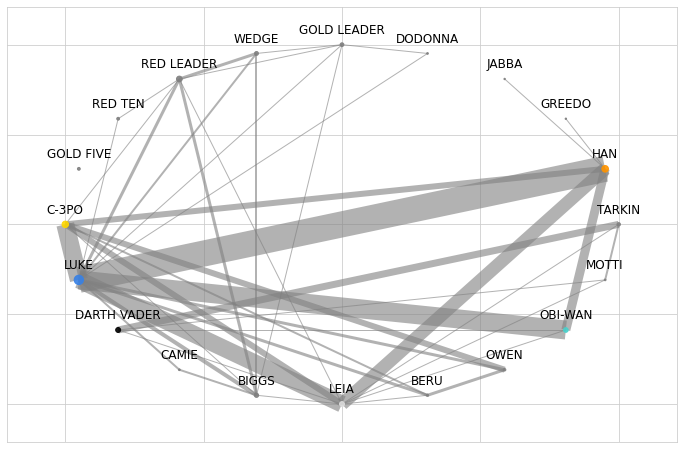

In [ ]:
attribute1='value'
attribute2='colour'
attribute3='name'
widths = nx.get_edge_attributes(SW, 'weight')
nodelist = SW.nodes()

plt.figure(figsize=(12,8))

pos = nx.shell_layout(SW)
nx.draw_networkx_nodes(SW,pos,
                       nodelist=nodelist,
                       node_size=list(nx.get_node_attributes(SW, attribute1).values()),
                       node_color=list(nx.get_node_attributes(SW, attribute2).values()),
                       alpha=0.9)
nx.draw_networkx_edges(SW,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='grey',
                       alpha=0.6)

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.08)

node_attrs = nx.get_node_attributes(SW, 'name')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] =  attr 

nx.draw_networkx_labels(SW, pos_attrs, labels=custom_node_attrs)
plt.show()


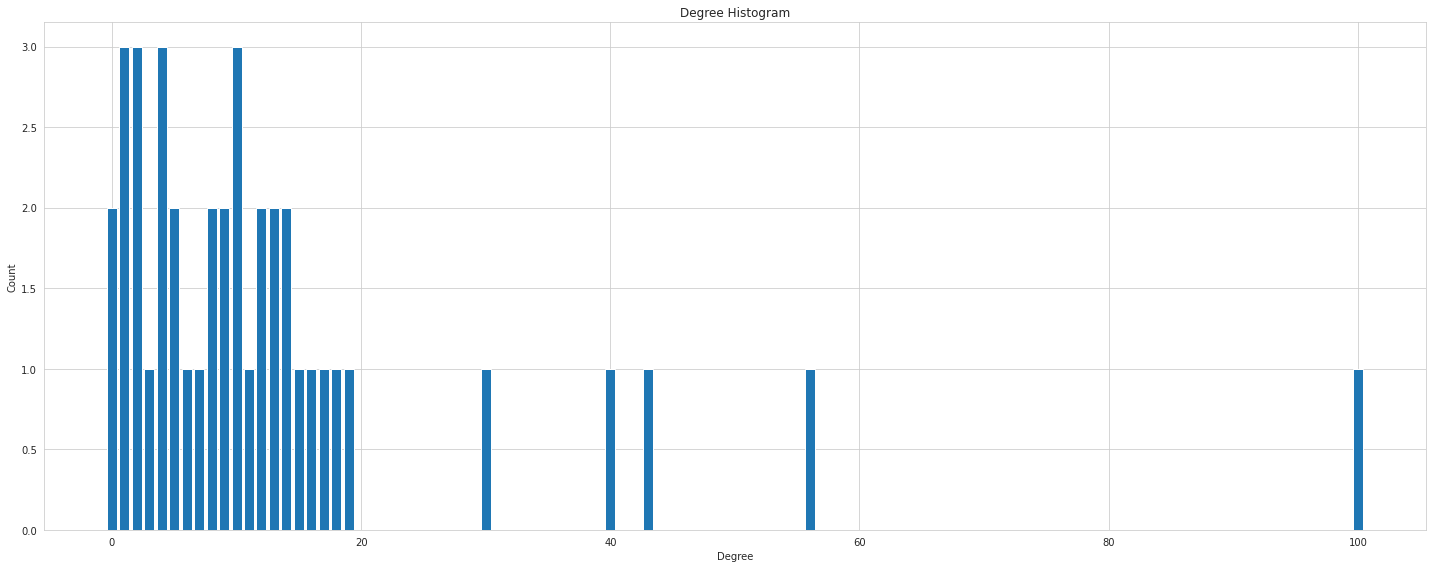

In [ ]:
# importance analysis
degrees = SW.degree(weight='weight')
degree_seq = sorted(degrees, key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(*np.unique(degree_seq, return_counts=True))
ax.set_title("Degree Histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("Count")
fig.tight_layout()
plt.show()

[(1, 100), (11, 56), (5, 43), (0, 40), (8, 30), (4, 14), (17, 13), (7, 12), (2, 10), (10, 10), (6, 9), (16, 8), (15, 5), (3, 4), (9, 4), (14, 2), (18, 2), (12, 1), (13, 1), (19, 0)]


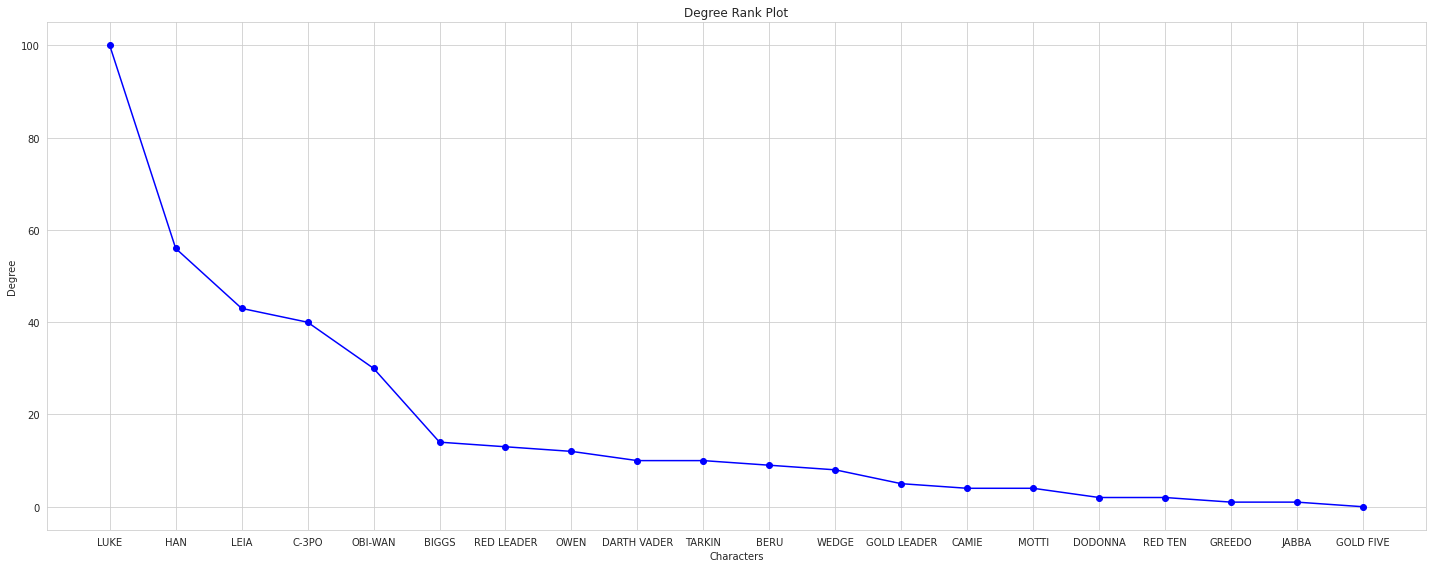

In [ ]:

degree_seq=sorted(degrees, key=lambda x: x[1], reverse=True)

print(degree_seq)

character = [degree_seq[x][0] for x in np.arange(0, len(degree_seq))]
val = [degree_seq[x][1] for x in np.arange(0, len(degree_seq))]
label = [custom_node_attrs[i] for i in character]

y_pos = np.arange(len(character))


fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(val, "b-", marker="o")
ax.set_title("Degree Rank Plot")
ax.set_ylabel("Degree")
ax.set_xlabel("Characters")
ax.set_xticks(y_pos)
ax.set_xticklabels(label)


fig.tight_layout()
plt.show()


{0: 0.2618908382066277, 1: 0.07202729044834308, 2: 0.0029239766081871343, 3: 0.0, 4: 0.23742690058479532, 5: 0.3876218323586744, 6: 0.05750487329434697, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.19298245614035087, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.19044834307992203, 16: 0.0, 17: 0.23538011695906436, 18: 0.02358674463937621, 19: 0.0}
[(5, 0.3876218323586744), (0, 0.2618908382066277), (4, 0.23742690058479532), (17, 0.23538011695906436), (11, 0.19298245614035087), (15, 0.19044834307992203), (1, 0.07202729044834308), (6, 0.05750487329434697), (18, 0.02358674463937621), (2, 0.0029239766081871343), (3, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (16, 0.0), (19, 0.0)]


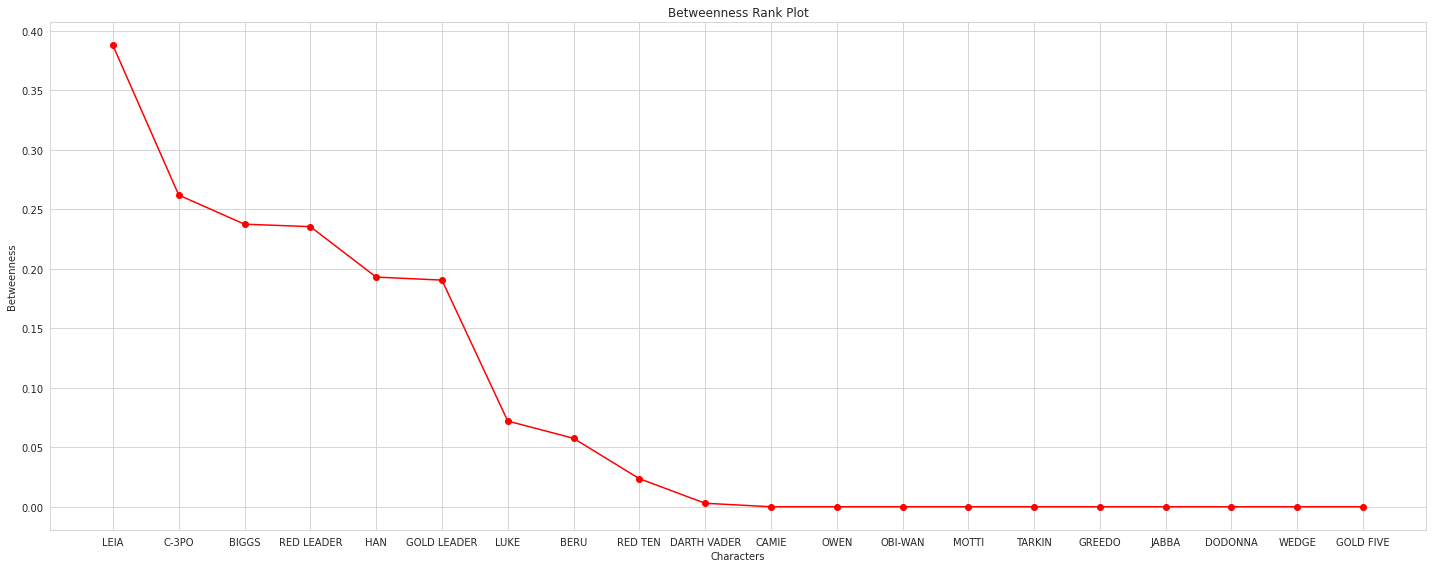

In [ ]:
 #centrality analysis
betwe = nx.betweenness_centrality(SW, weight='weight')
print(betwe)

betwe_seq = sorted(betwe.items(), key = lambda x:x[1], reverse=True)
print(betwe_seq)


character = [betwe_seq[x][0] for x in np.arange(0, len(betwe_seq))]
val = [betwe_seq[x][1] for x in np.arange(0, len(betwe_seq))]
label = [custom_node_attrs[i] for i in character]


y_pos = np.arange(len(character))


fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(val, "r-", marker="o")
ax.set_title("Betweenness Rank Plot")
ax.set_ylabel("Betweenness")
ax.set_xlabel("Characters")
ax.set_xticks(y_pos)
ax.set_xticklabels(label)


fig.tight_layout()
plt.show()

[40, 100, 10, 4, 14, 43, 9, 12, 30, 4, 10, 56, 1, 1, 2, 5, 8, 13, 2, 0]
[0.2618908382066277, 0.07202729044834308, 0.0029239766081871343, 0.0, 0.23742690058479532, 0.3876218323586744, 0.05750487329434697, 0.0, 0.0, 0.0, 0.0, 0.19298245614035087, 0.0, 0.0, 0.0, 0.19044834307992203, 0.0, 0.23538011695906436, 0.02358674463937621, 0.0]


Text(0.5, 0, 'Degree')

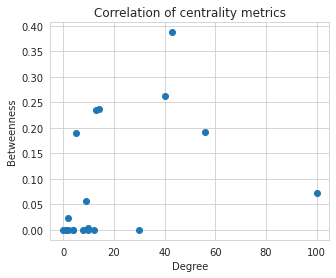

In [ ]:
deg = [a[1] for a in degrees]
print(deg)
b=[*betwe.values()]
print(b)
plt.scatter(deg,b)
plt.title("Correlation of centrality metrics")
plt.ylabel("Betweenness")
plt.xlabel("Degree")